In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, f1_score, precision_score, recall_score

In [2]:
df = pd.read_csv('../datasets/global_riverine_plastic_emissions_cleaned.csv')

In [3]:
df

,Country or Administrative area,Area [km2],Coast length [km],Rainfall [mm year -1],Factor L/A [-],Factor (L/A) *P [-],P[E] [%],MPW (metric tons year -1),M[E] (metric tons year -1),Ratio Me/MPW,plastic_contribution
0,Albania,28486.0,362.0,1117.0,0.0100,14.0,1.56,69833.0,1565.0,2.24,1
1,Algeria,2316559.0,998.0,80.0,0.0004,0.0,0.09,764578.0,5774.0,0.76,1
2,Angola,1247357.0,1600.0,1025.0,0.0010,1.0,0.09,236946.0,860.0,0.36,1
3,Antigua and Barbuda,443.0,153.0,996.0,0.3000,344.0,3.08,627.0,2.0,0.29,1
4,Argentina,2779705.0,4989.0,567.0,0.0020,1.0,0.26,465808.0,4137.0,0.89,1
...,...,...,...,...,...,...,...,...,...,...,...
160,Venezuela,912557.0,2800.0,1875.0,0.0030,6.0,0.39,671431.0,5988.0,0.89,1
161,Vietnam,327732.0,3444.0,1772.0,0.0100,19.0,1.60,1112790.0,28221.0,2.54,0
162,Western Sahara,266830.0,111.0,35.0,0.0004,0.0,0.11,4114.0,38.0,0.91,1
163,Yemen,419900.0,1906.0,112.0,0.0050,1.0,0.07,291737.0,252.0,0.09,1


In [4]:
df.isnull().sum()

Country or Administrative area    2
Area [km2]                        2
Coast length [km]                 2
Rainfall [mm year -1]             2
Factor L/A [-]                    2
Factor (L/A) *P [-]               2
P[E] [%]                          2
MPW (metric tons year -1)         2
M[E] (metric tons year -1)        2
Ratio Me/MPW                      2
plastic_contribution              0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

Country or Administrative area    0
Area [km2]                        0
Coast length [km]                 0
Rainfall [mm year -1]             0
Factor L/A [-]                    0
Factor (L/A) *P [-]               0
P[E] [%]                          0
MPW (metric tons year -1)         0
M[E] (metric tons year -1)        0
Ratio Me/MPW                      0
plastic_contribution              0
dtype: int64

In [7]:
df['plastic_contribution'].value_counts()

plastic_contribution
1    147
0     16
Name: count, dtype: int64

In [8]:
X =df.drop( columns=['Country or Administrative area','plastic_contribution'])
y = df['plastic_contribution']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')

In [11]:
model.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')

In [12]:
y_pred = model.predict(x_test)

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.96      0.98        28

    accuracy                           0.97        33
   macro avg       0.92      0.98      0.95        33
weighted avg       0.97      0.97      0.97        33



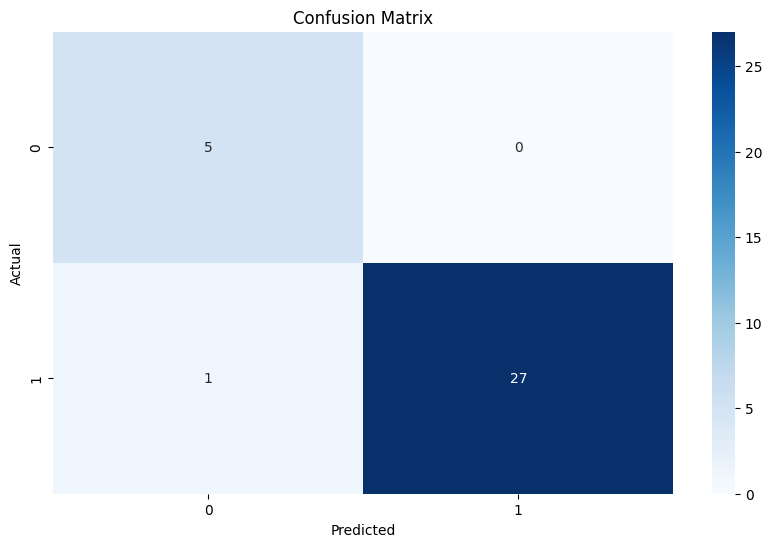

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()  

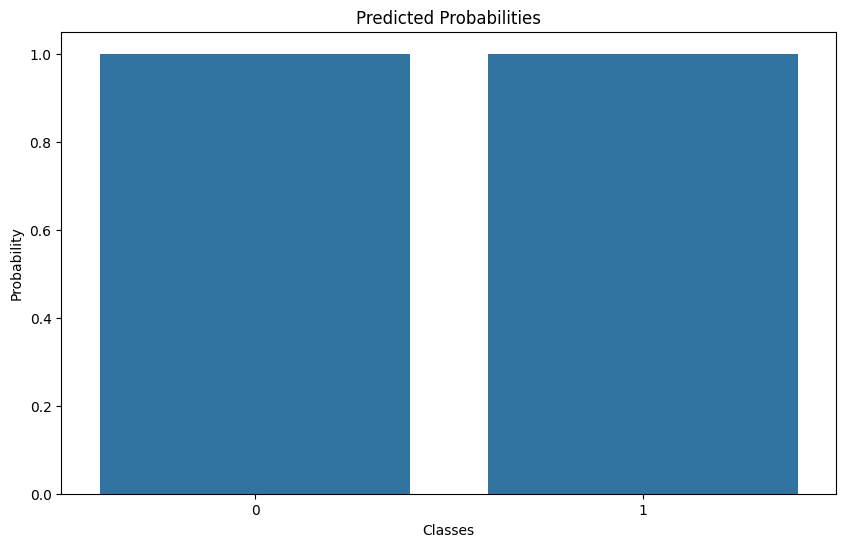

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x=model.classes_, y=model.predict_proba(x_test).max(axis=0))
plt.title('Predicted Probabilities')
plt.xlabel('Classes')
plt.ylabel('Probability')
plt.show()